# Importing libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

# Importing data

In [2]:
df=pd.read_csv("new data.csv")



In [3]:
df.set_index("Date",inplace=True)

In [19]:
df.head()


,Confirmed
Date,
15-05-2021,831402
16-05-2021,841682
17-05-2021,853279
18-05-2021,863128
19-05-2021,872977


# Checking for stationarity

In [5]:
test_result=adfuller(df['Confirmed'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Confirmed):
    result=adfuller(Confirmed)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
adfuller_test(df['Confirmed'])        

ADF Test Statistic : 1.5585417064083291
p-value : 0.9977277102524145
Lags Used : 13
Number of Observations Used : 429
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since p-value(1.00) is greater than the significance level(0.05), let’s difference the series and see how the autocorrelation plot looks like.

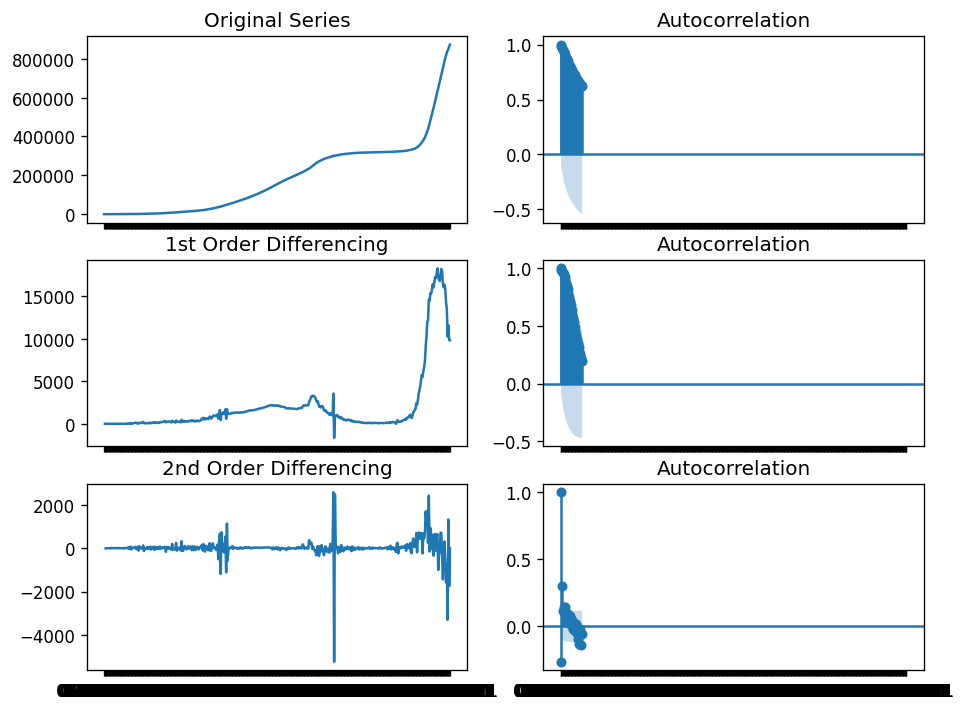

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.Confirmed); axes[0, 0].set_title('Original Series')
plot_acf(df.Confirmed, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Confirmed.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Confirmed.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Confirmed.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Confirmed.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
# d=2

# Finding the order of the AutoRegression term(p)

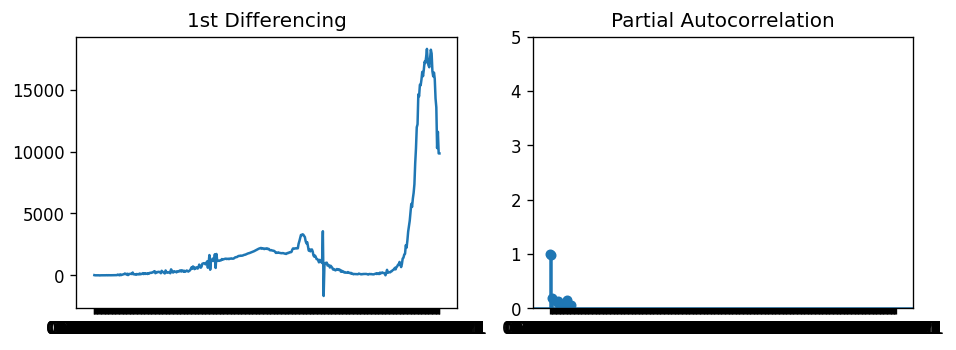

In [7]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Confirmed.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Confirmed.diff().dropna(), ax=axes[1])

plt.show()
# p=1

# Finding the order of the Moving Average term (q)

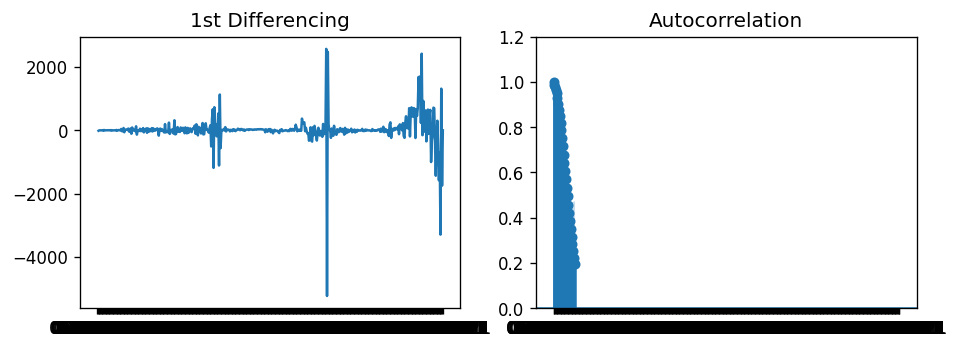

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Confirmed.diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Confirmed.diff().dropna(), ax=axes[1])
plt.show()
# q=2

# Building the ARIMA Model

In [9]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.Confirmed, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                  442
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3300.110
Method:                       css-mle   S.D. of innovations            420.629
Date:                Thu, 15 Jul 2021   AIC                           6610.220
Time:                        15:37:34   BIC                           6630.677
Sample:                             1   HQIC                          6618.289
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3331.7955   3136.479      1.062      0.288   -2815.590    9479.181
ar.L1.D.Confirmed     0.9952      0.004    240.686      0.000       0.987       1.003
ma.L1.D.Confirmed    -0.

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


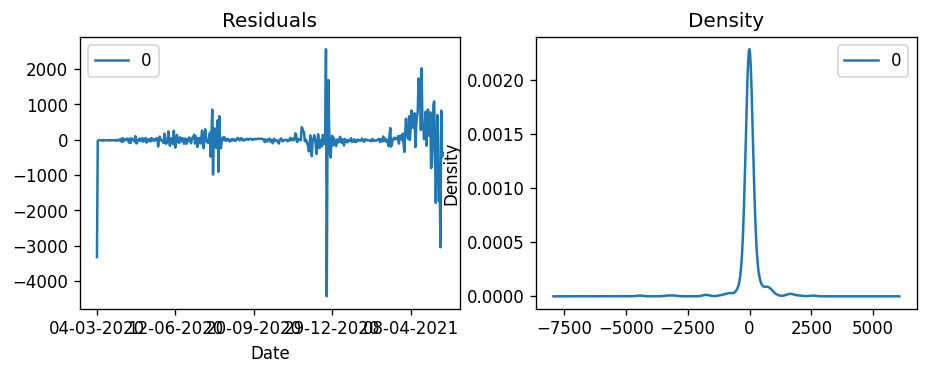

In [31]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near 0 mean and uniform varience.
So now we predict the actual values against the fitted values using plot_predict().

In [1]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

NameError: name 'model_fit' is not defined

So we have decent ARIMA model but we can not say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.
So,the real validation we need now is the Out-of-Time cross-validation, discussed next.

In [30]:
from statsmodels.tsa.stattools import acf
n= int(len(df)*0.8)
# Create Training and Test
train = df.Confirmed[:n]
test = df.Confirmed[n:]
print(f"The number of elements in train set are = {len(train)}")
print(f"The number of elements in test set are = {len(test)}")

The number of elements in train set are = 354
The number of elements in test set are = 89


c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

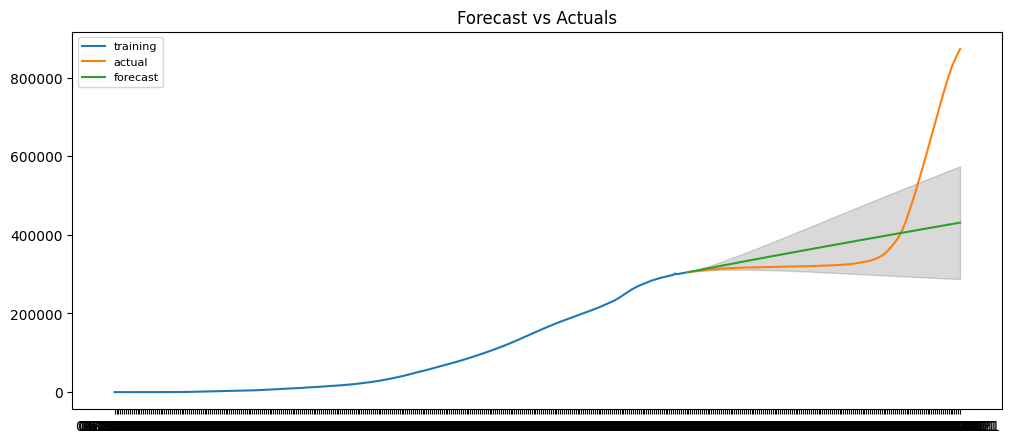

In [13]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3,1,2))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(143, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [14]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.14408147535568736,
 'me': -25901.4678439617,
 'mae': 74274.27939084107,
 'mpe': 0.003929981512306124,
 'rmse': 129236.69186463309,
 'acf1': 0.9606306879252873,
 'corr': 0.726338496070619,
 'minmax': 0.1356196621920741}

# Forecasting using libraries

In [15]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.Confirmed, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6660.153, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8553.857, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8039.172, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8655.672, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6639.109, Time=0.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6532.318, Time=1.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6526.428, Time=1.49 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6532.660, Time=1.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=6530.100, Time=0.89 sec

Best model:  ARIMA(3,1,2)(0,0,0)[0] intercept
Total fit t

(array([6.50505647e-06, 0.00000000e+00, 0.00000000e+00, 1.95151694e-05,
        2.01656751e-04, 1.65878940e-03, 5.20404518e-05, 0.00000000e+00,
        0.00000000e+00, 6.50505647e-06]),
 array([-2676.55604721, -2162.4203715 , -1648.28469578, -1134.14902007,
         -620.01334436,  -105.87766864,   408.25800707,   922.39368279,
         1436.5293585 ,  1950.66503421,  2464.80070993]),
 <BarContainer object of 10 artists>)

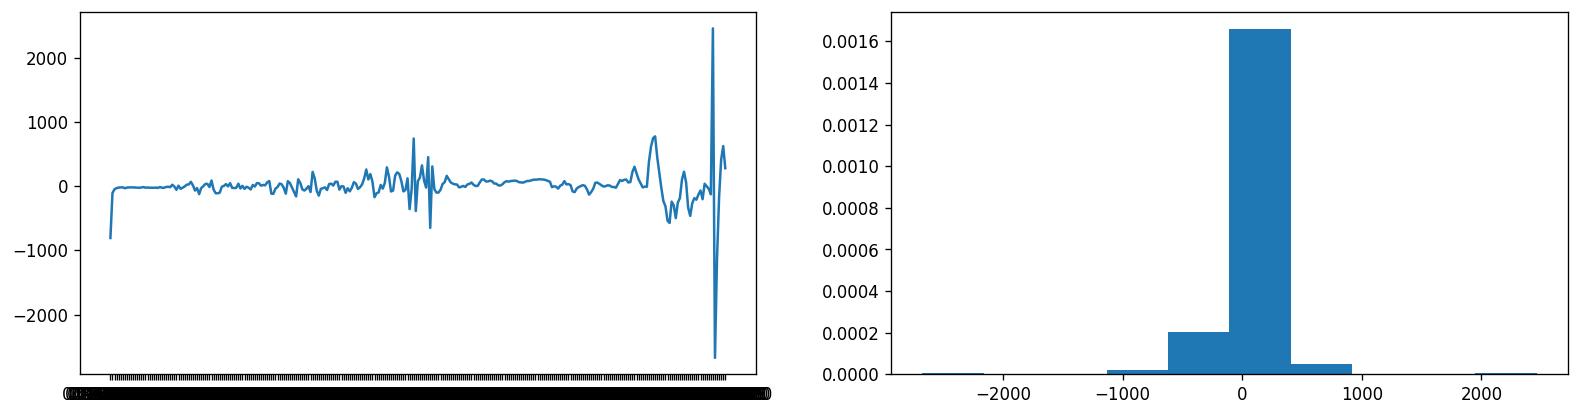

In [16]:
residuals=pd.DataFrame(fitted.resid)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)

c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\users\ayush\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


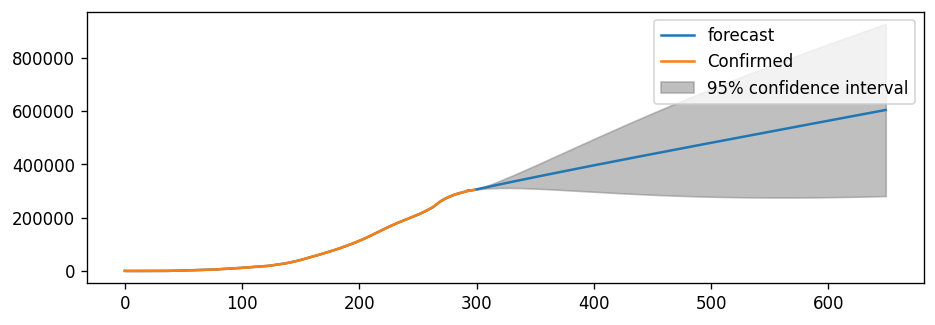

In [21]:
fitted.plot_predict(
    start= 1,
    end=650,
    dynamic=False,
);